# 📘 Data Science Modelling Test Part - 1

This notebook documents the end-to-end process of a data science modelling task. The objective is to build a machine learning model to predict a binary outcome based on historical loan data.

## 🧾 Project Overview

The project involves the following key steps:

- **Data Understanding**: Explore and understand the structure and distribution of the dataset.
- **Target Variable Definition**: Define a binary target based on domain-specific logic.
- **Data Preprocessing**: Clean and prepare the data, including handling missing values and feature engineering.
- **Model Development**: Build and train machine learning models (e.g., XGBoost) using cross-validation for evaluation.
- **Model Selection**: Compare model performance using metrics such as Gini score and ROC AUC to choose the most stable and generalizable model.
- **Model Evaluation**: Test the final model on an unseen out-of-time dataset and analyze results using visualizations like ROC curves, PDP, and ICE plots.
- **Business Impact**: Determine an optimal decision threshold based on cost/benefit analysis to support real-world decision-making.

## 🔧 Tools & Techniques

- Python (Pandas, NumPy, Scikit-learn, XGBoost, Matplotlib, Seaborn)
- Cross-validation, ROC Curve, Gini Coefficient
- Partial Dependence Plot (PDP), Individual Conditional Expectation (ICE)
- Cost-benefit analysis for threshold tuning

This notebook provides a transparent, reproducible workflow for developing a robust predictive model suited for real-world deployment.


1. Importing the libraries


In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
import xgboost as xgb
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import RocCurveDisplay, roc_curve, auc


In [221]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [222]:
%cd /content/drive/My Drive/Colab Notebooks/


/content/drive/My Drive/Colab Notebooks


# 1. 📊 Data Exploration & Visualization

Before building a predictive model, it's crucial to understand the dataset through exploration and visualization. This step helps identify issues, trends, and patterns that inform feature engineering and model design.


In [223]:
df = pd.read_csv('credit_card_2015_2016.csv')

In [224]:
df.head()

,term,sub_grade,grade,emp_length,issue_y,revol_util_n,int_rate_n,installment_n,tot_hi_cred_lim_n,dti_n,avg_cur_bal_n,all_util_n,acc_open_past_24mths_n,annual_inc_n,loan_amnt_n,loan_status
0,60 months,C4,C,10+ years,15,87.1,14.31,702.30,350349,36.91,35256,100,1,98000.0,29975,Fully Paid
1,60 months,C1,C,< 1 year,15,57.0,12.29,268.70,43525,18.80,2990,100,2,45000.0,12000,Fully Paid
2,36 months,B3,B,1 year,15,42.8,9.99,258.10,72655,19.34,6569,100,5,62500.0,8000,Fully Paid
3,36 months,A4,A,3 years,15,95.7,7.26,433.95,62695,11.31,9416,100,0,127000.0,14000,Fully Paid
4,36 months,B5,B,< 1 year,15,91.8,11.53,758.78,120674,23.07,7059,100,6,116000.0,23000,Fully Paid


In [225]:
df.tail()

,term,sub_grade,grade,emp_length,issue_y,revol_util_n,int_rate_n,installment_n,tot_hi_cred_lim_n,dti_n,avg_cur_bal_n,all_util_n,acc_open_past_24mths_n,annual_inc_n,loan_amnt_n,loan_status
39995,60 months,B2,B,10+ years,16,35.5,9.17,583.55,122800,9.80,4215,46,6,145000.0,28000,Fully Paid
39996,36 months,A5,A,< 1 year,16,59.1,7.89,782.15,68000,14.09,2680,59,2,80000.0,25000,Fully Paid
39997,60 months,F4,F,9 years,16,52.2,26.14,720.57,138501,30.21,6375,60,12,96000.0,24000,Fully Paid
39998,36 months,D2,D,6 years,16,70.3,17.99,542.22,71572,13.47,5046,78,11,187650.0,15000,Charged Off
39999,36 months,C4,C,5 years,16,78.3,14.49,413.00,125085,30.30,5209,68,6,90000.0,12000,Fully Paid


In [226]:
#To check all columns are loaded correctly.
#Identifies data types, null values, and the general structure.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   term                    40000 non-null  object 
 1   sub_grade               40000 non-null  object 
 2   grade                   40000 non-null  object 
 3   emp_length              37459 non-null  object 
 4   issue_y                 40000 non-null  int64  
 5   revol_util_n            40000 non-null  float64
 6   int_rate_n              40000 non-null  float64
 7   installment_n           40000 non-null  float64
 8   tot_hi_cred_lim_n       40000 non-null  int64  
 9   dti_n                   40000 non-null  float64
 10  avg_cur_bal_n           40000 non-null  int64  
 11  all_util_n              40000 non-null  int64  
 12  acc_open_past_24mths_n  40000 non-null  int64  
 13  annual_inc_n            40000 non-null  float64
 14  loan_amnt_n             40000 non-null

In [227]:
df.shape

(40000, 16)

In [228]:
# 🔍 Missing Values
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)


,0
emp_length,2541


This code block shows the Target variable distribution

Insights:
- This reveals 'class imbalance' in the target variable.
- It also informs resampling or weighting strategies during modeling.

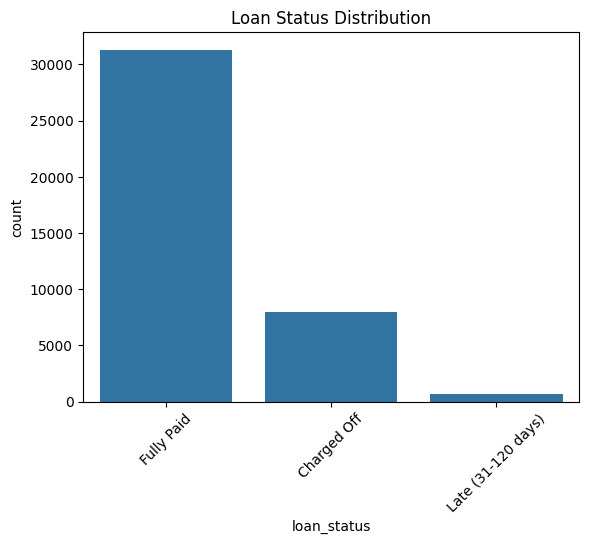

,count
loan_status,
Fully Paid,31320
Charged Off,7987
Late (31-120 days),693


In [229]:
sns.countplot(data=df, x='loan_status')
plt.title("Loan Status Distribution")
plt.xticks(rotation=45)
plt.show()

df['loan_status'].value_counts()

In [230]:
int_rate_value = df.groupby('loan_status')['int_rate_n'].value_counts().reset_index(name='count')

# Create the scatter plot
scatter_plot = px.scatter(
    int_rate_value,
    x='int_rate_n',  # Interest Rate on the x-axis
    y='count',  # Count of Interest Rates on the y-axis
    color='loan_status',  # Color by Loan Status
    title="Loan Status vs Interest Rate",
    labels={"int_rate_n": "Interest Rate", "count": "Count of Interest Rates"},
    size='count',  # Size of points based on count (optional)
    hover_data=["loan_status", "int_rate_n", "count"],  # Additional info on hover
)

# Show the plot
scatter_plot.show()

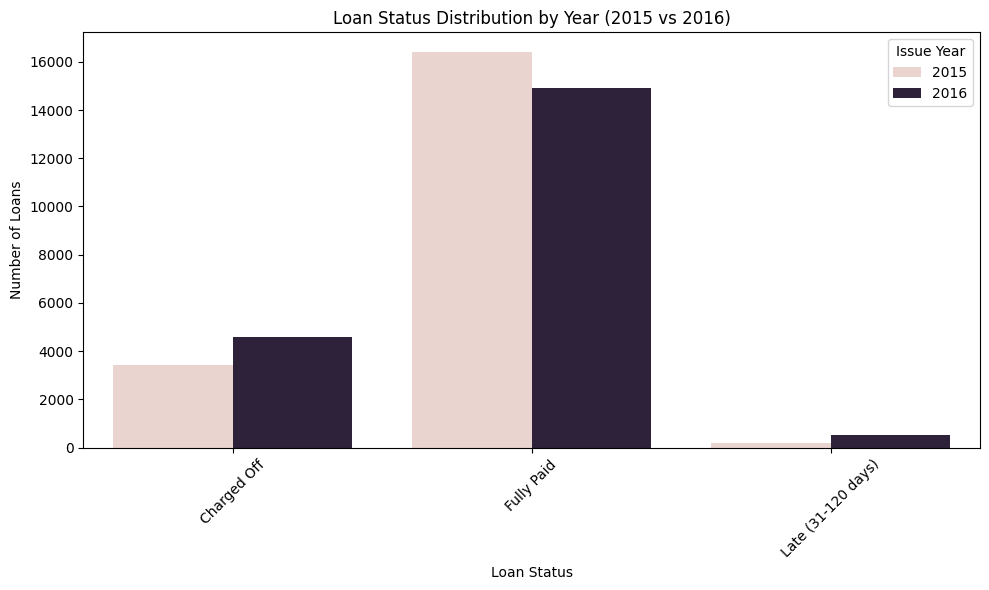

In [231]:
# Map 'issue_y' to actual year values
df['issue_year'] = df['issue_y'].map({15: 2015, 16: 2016})

# Group by loan_status and issue_year to count records
status_by_year = df.groupby(['issue_year', 'loan_status']).size().reset_index(name='count')

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=status_by_year, x='loan_status', y='count', hue='issue_year')
plt.title('Loan Status Distribution by Year (2015 vs 2016)')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.legend(title='Issue Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Creating the Binary Target Variable

Converting loan_status into a binary Outcome variable:

-> 1 = Default (Charged Off, Late(31-120 days)

-> 0 = Non-default (Fully Paid).

By grouping both charged off and Late(31-120days) as `Outcome = 1`, we teach the model to detect:
- **Existing bad loans**, and
- **Loans that are heading toward default**

Thus, grouping `Charged Off` and `Late (31–120 days)` as high-risk enables a **forward-looking, loss-aware model** that supports **both tactical actions (like collections)** and **strategic decisions (like underwriting).**

In [232]:
# Define which statuses are high-risk (to be labeled as 1)
high_risk_statuses = ['Charged Off', 'Late (31-120 days)']

# Apply transformation
df['Outcome'] = df['loan_status'].apply(lambda x: 1 if x in high_risk_statuses else 0)

# Confirm transformation
print(df['Outcome'].value_counts())


Outcome
0    31320
1     8680
Name: count, dtype: int64


In [233]:
#Unit Testing

df.groupby(['loan_status', 'Outcome']).size()


,,0
loan_status,Outcome,
Charged Off,1,7987
Fully Paid,0,31320
Late (31-120 days),1,693


###Default Rate Comparison by Year

Checking if the default rate (`Outcome = 1`) changed from 2015 to 2016.


This insight is valuable because:
- An increase in default rate could signal **looser underwriting**, **macroeconomic changes**, or **riskier borrowers**.
- A **decrease** could indicate **improved screening** or better borrower quality.

Understanding these shifts helps ensure our model is trained on data that reflects real-world patterns and is robust across time.


In [234]:
yearly_default_rate = df.groupby('issue_y')['Outcome'].mean().reset_index()
yearly_default_rate['Default_Rate_%'] = yearly_default_rate['Outcome'] * 100
yearly_default_rate


,issue_y,Outcome,Default_Rate_%
0,15,0.17995,17.995
1,16,0.25405,25.405


**Trend Visualization: Year vs. Outcome**

Visualizing the risk distribution over the year 2015 to 2016.

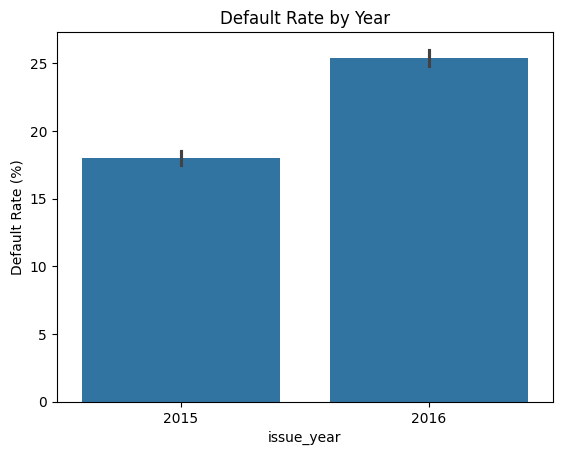

In [235]:
sns.barplot(x='issue_year', y='Outcome', data=df, estimator=lambda x: sum(x)/len(x) * 100)
plt.ylabel("Default Rate (%)")
plt.title("Default Rate by Year")
plt.show()

##Volume of High-Risk vs. Low-Risk Loans by Year

Understanding whether the volume of high-risk loans is changing (not just the rate).

For reference:

- Low-Risk = 0 (Fully Paid)
- High-Risk = 1 (Charged-0ff, Late(31-120 days))

If more 'high-risk' loans were approved in 2016, even at the same rate, total **loss exposure** would rise.


In [236]:
volume_dist = df.groupby(['issue_year', 'Outcome']).size().unstack().rename(columns={0: 'Low Risk', 1: 'High Risk'})
volume_dist

Outcome,Low Risk,High Risk
issue_year,,
2015,16401,3599
2016,14919,5081


In [237]:
# Split data by year for training and OOT (out-of-time) validation
mdl_train_df = df[df['issue_year'] == 2015].copy()  # Use 2015 data for model training
ott_test_df = df[df['issue_year'] == 2016].copy()   # Use 2016 data for OOT evaluation

print(f"Training set shape: {mdl_train_df.shape}")
print(f"Test set (OOT) shape: {ott_test_df.shape}")


Training set shape: (20000, 18)
Test set (OOT) shape: (20000, 18)


In [238]:
# Drop the 'issue_year' column from both datasets
mdl_train_df = mdl_train_df.drop(columns='issue_year')
ott_test_df = ott_test_df.drop(columns='issue_year')

# Confirm the shapes or check columns if needed
print(f"Training set shape after drop: {mdl_train_df.shape}")
print(f"Test set shape after drop: {ott_test_df.shape}")


Training set shape after drop: (20000, 17)
Test set shape after drop: (20000, 17)


##These below EDA's would be focusing on distinguishing high-risk from low-risk borrowers. That means here we prioritize:

- Understanding what features are most different between Outcome = 1 and Outcome = 0 (helps in knowing which features actual co-relate in risk analysis)

- Finding risk signals: what makes a borrower more likely to default

- Identifying early indicators of high risk to support prevention

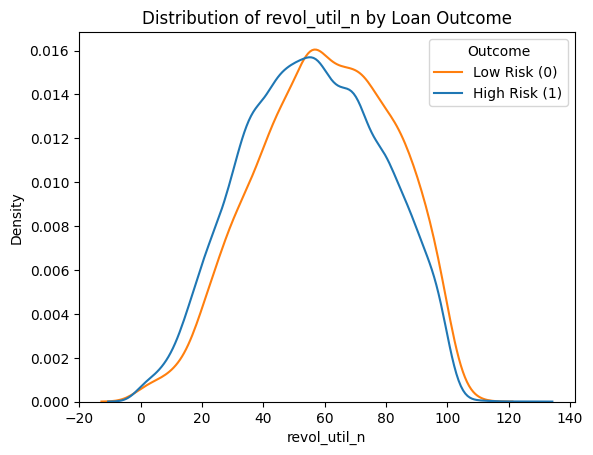

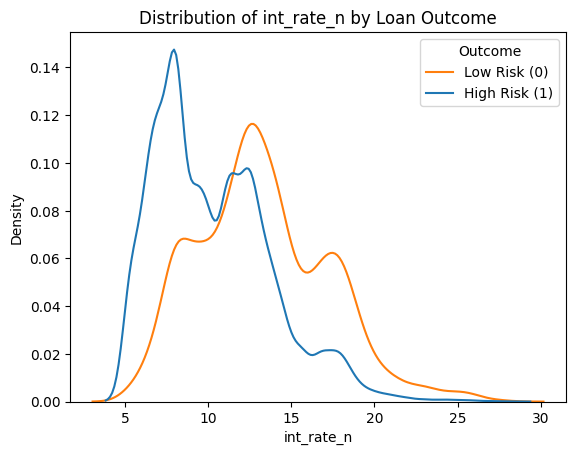

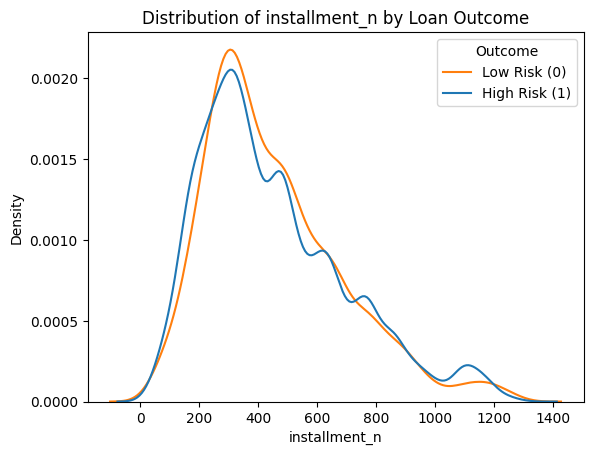

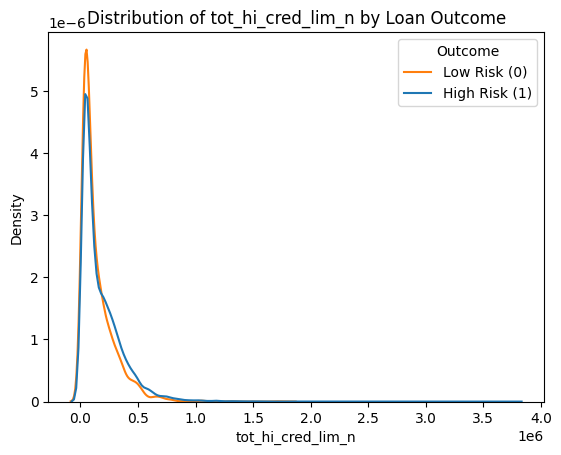

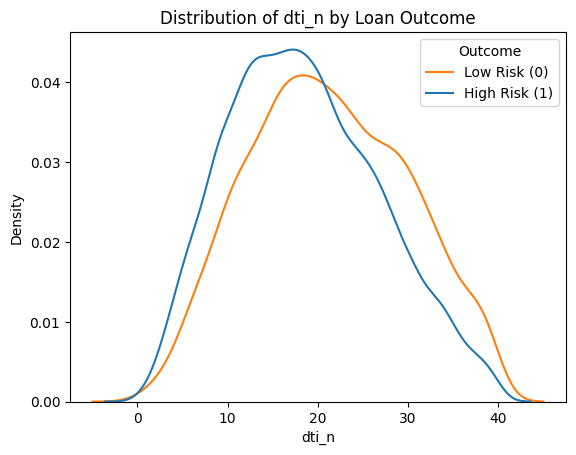

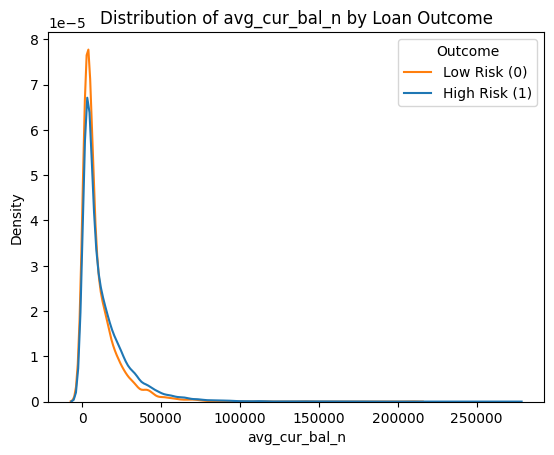

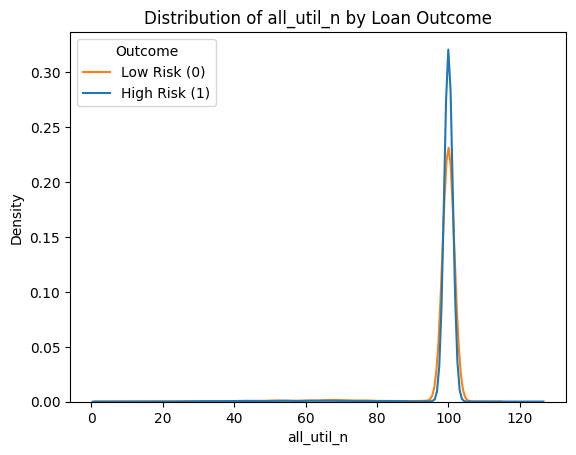

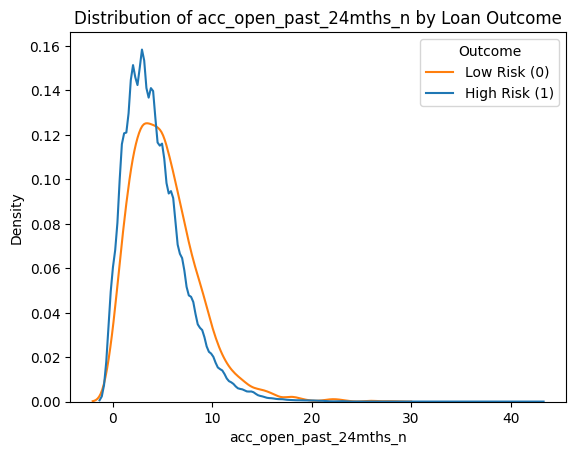

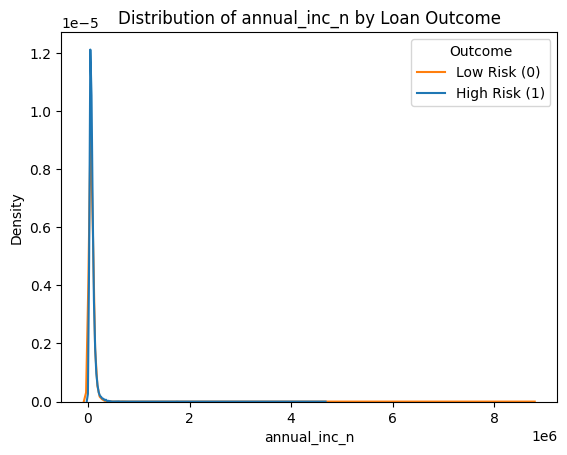

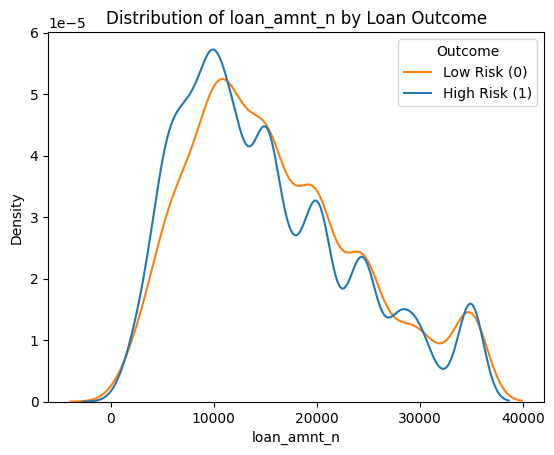

In [239]:
# List of normalized numeric features to analyze
numeric_vars = [col for col in df.columns if col.endswith('_n') and col != 'issue_y']


# Plot distributions for each feature grouped by Outcome
for col in numeric_vars:
    sns.kdeplot(data=mdl_train_df, x=col, hue='Outcome', common_norm=False)
    plt.title(f"Distribution of {col} by Loan Outcome")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend(title="Outcome", labels=["Low Risk (0)", "High Risk (1)"])
    plt.show()

## Identified the top 10 numerical features most correlated with high-risk loans. The bar chart and table below show which borrower attributes are strongest indicators of default.


<ipython-input-240-099c248f8520>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




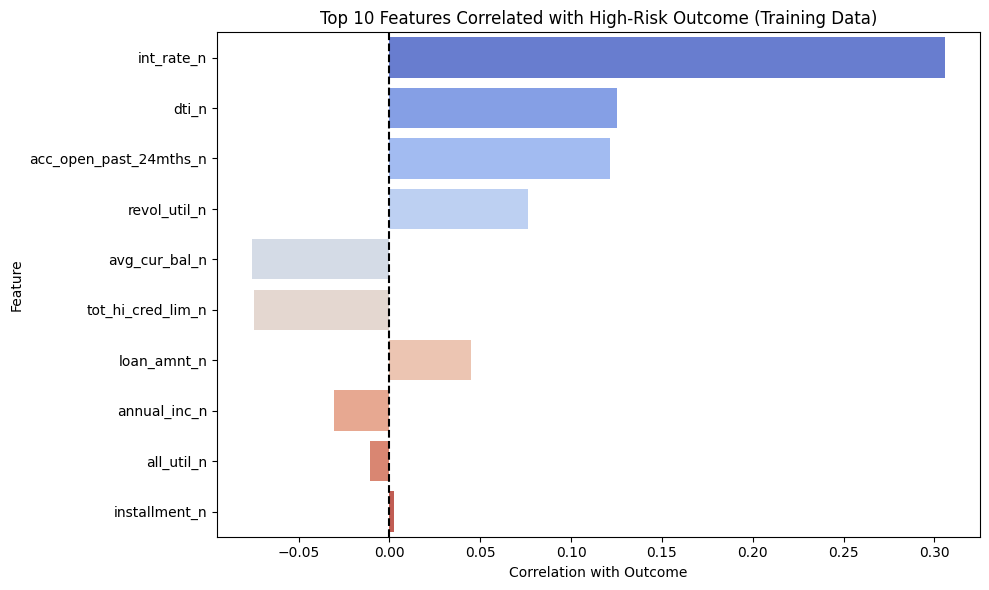

Top 10 features most correlated with high-risk outcome:


,Feature,Correlation with Outcome
1,int_rate_n,0.306014
4,dti_n,0.125286
7,acc_open_past_24mths_n,0.121499
0,revol_util_n,0.076539
5,avg_cur_bal_n,-0.075805
3,tot_hi_cred_lim_n,-0.074801
9,loan_amnt_n,0.044792
8,annual_inc_n,-0.030371
6,all_util_n,-0.010503
2,installment_n,0.002351


In [240]:
# List of normalized numeric features
numeric_vars = [col for col in mdl_train_df.columns if col.endswith('_n') and col != 'issue_y']

# Calculate correlation of each numeric feature with the binary target 'Outcome'
correlations = {var: mdl_train_df[var].corr(mdl_train_df['Outcome']) for var in numeric_vars}

# Create DataFrame from correlation results
corr_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation with Outcome'])

# Add absolute correlation for sorting
corr_df['AbsCorr'] = corr_df['Correlation with Outcome'].abs()

# Get top 10 features most correlated with high-risk outcome
top10_corr = corr_df.sort_values(by='AbsCorr', ascending=False).head(10)

# Plot top 10 correlations
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_corr, x='Correlation with Outcome', y='Feature', palette='coolwarm')
plt.title('Top 10 Features Correlated with High-Risk Outcome (Training Data)')
plt.axvline(x=0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

# Display top 10 correlation table
print("Top 10 features most correlated with high-risk outcome:")
display(top10_corr[['Feature', 'Correlation with Outcome']])


##Analyzing default rates across key categorical variables. The plots below show how the proportion of high-risk loans varies by category, helping identify segments with elevated credit risk.


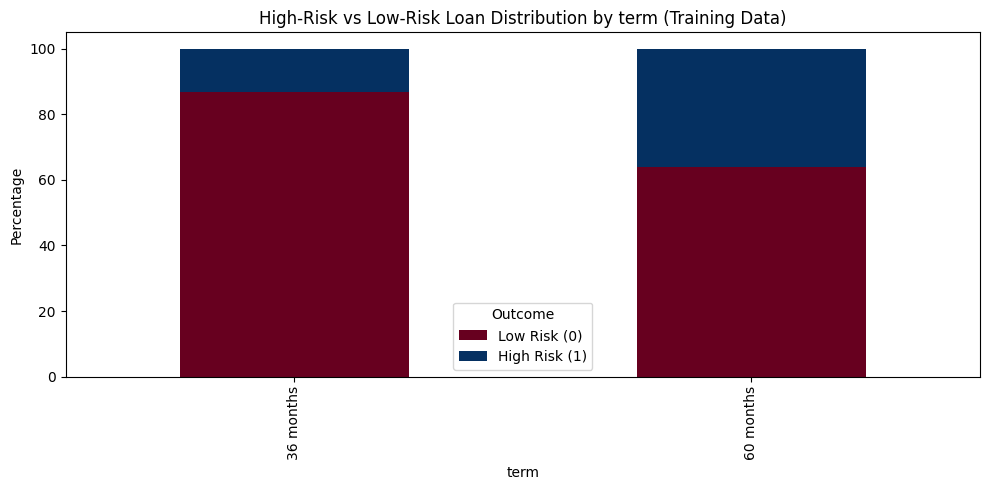

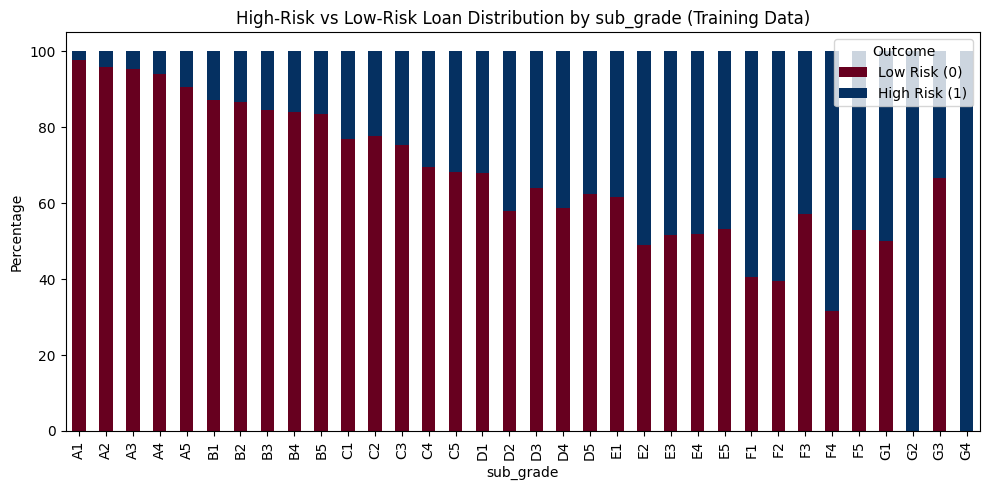

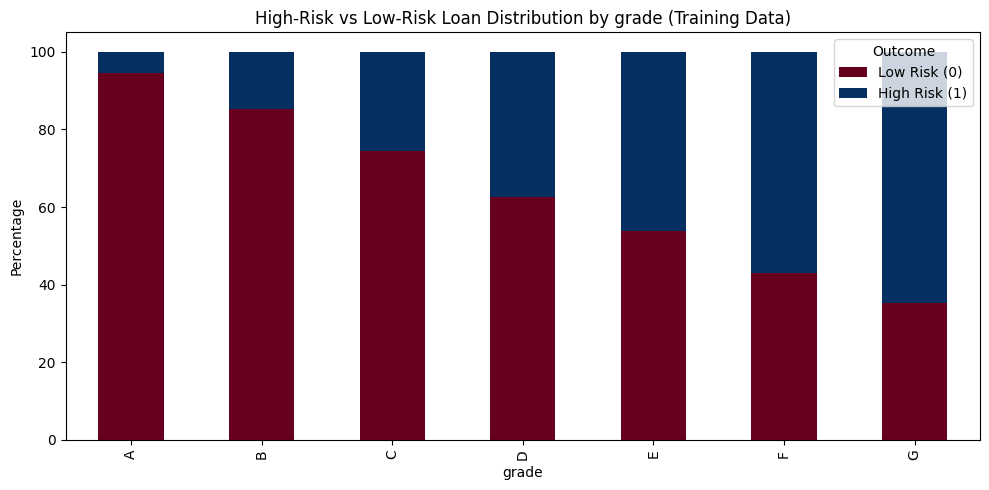

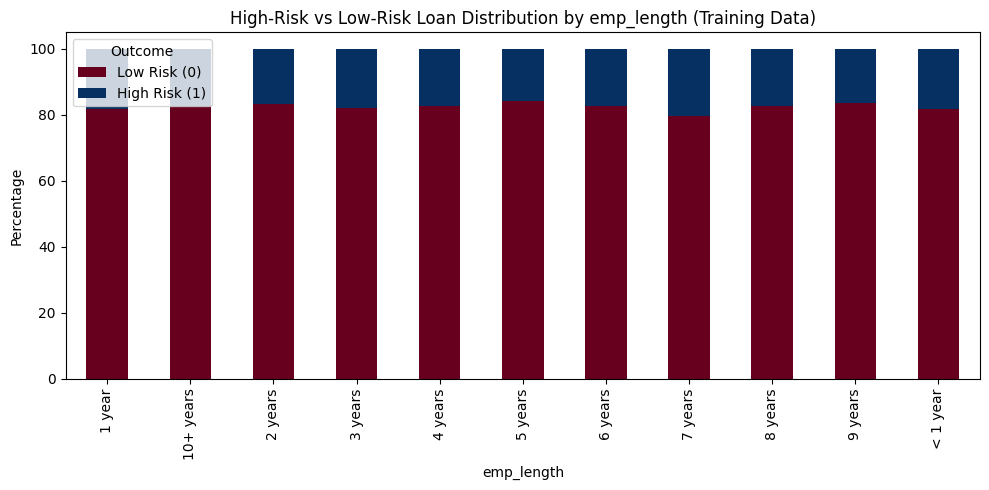

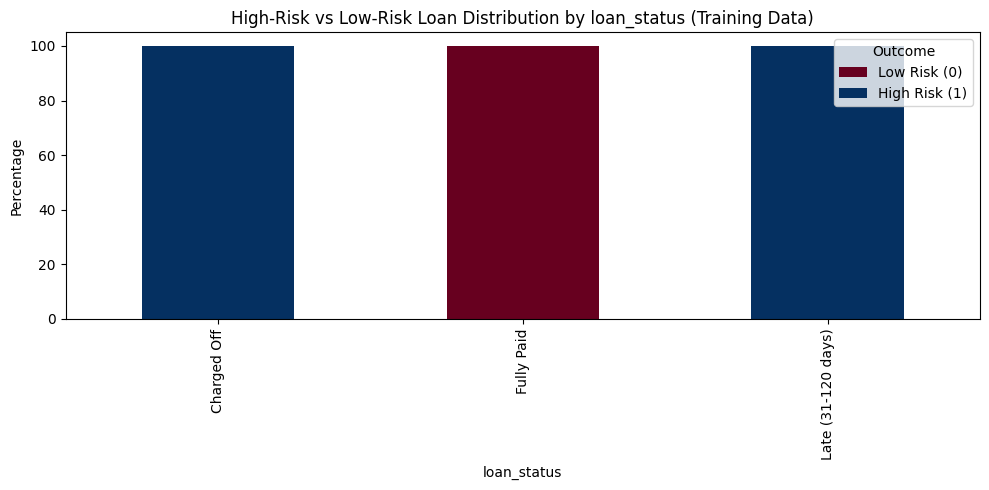

In [241]:
# Select categorical variables from the training data
categorical_vars = mdl_train_df.select_dtypes(include=['object', 'category']).columns

# Plot the percentage distribution of high-risk vs low-risk loans for each categorical feature
for col in categorical_vars:
    plt.figure(figsize=(10, 5))
    # Calculate percentage of Outcome (0 or 1) within each category
    risk_distribution = pd.crosstab(mdl_train_df[col], mdl_train_df['Outcome'], normalize='index') * 100
    risk_distribution.plot(kind='bar', stacked=True, colormap='RdBu', ax=plt.gca())
    plt.title(f'High-Risk vs Low-Risk Loan Distribution by {col} (Training Data)')
    plt.ylabel('Percentage')
    plt.xlabel(col)
    plt.legend(title='Outcome', labels=['Low Risk (0)', 'High Risk (1)'])
    plt.tight_layout()
    plt.show()


# 3. Feature Engineering and Pre-Processing

### Feature Engineering Summary

To enhance model accuracy and capture real-world borrower behavior, we implemented a comprehensive feature engineering pipeline that includes both **base-level transformations** and **advanced derived metrics**.

### Base-Level Features:
These features help capture basic borrower risk indicators:
- `term_months`: Numeric loan term extracted from text (e.g., "36 months" → 36).
- `emp_length_years`: Converted employment duration from text (e.g., "10+ years") into numeric format.
- `dti_bucket`, `revol_util_bucket`: Bucketed debt-to-income and credit utilization into interpretable risk bands.
- `loan_to_income`: Loan amount relative to income — reflects affordability.
- `grade_numeric`: Ordinal transformation of `sub_grade` to encode creditworthiness.
- `payment_to_income`: Annualized loan payment as a percentage of income.
- `credit_util_rate`: Normalized total utilization of available credit.
- `avg_loan_per_account`: Loan amount divided by number of open accounts — debt spread.
- `interest_exposure`: Combined interest rate and loan size to estimate repayment stress.

### Advanced Engineered Features:
These capture deeper risk interactions and behavioral signals:
- `int_rate_term_interaction`, `grade_loan_interaction`, `dti_util_interaction`: Interactions between key credit traits to expose compounding risk.
- `log_annual_inc`, `int_rate_squared`: Non-linear transformations for better fit to borrower financial scale.
- `combined_risk_score`: A composite score built from normalized `grade`, `dti`, and `revol_util_n`.
- Flags:
  - `high_util_high_dti`: Combined burden flag (utilization > 70%, DTI > 25).
  - `high_risk_combo`: Borrowers with high interest + utilization + DTI.
  - `low_savings_indicator`: Low balance relative to income — a proxy for financial cushion.
- Credit capacity:
  - `available_income`: Disposable income after debt obligations.
  - `income_per_loan_dollar`: Measures loan burden relative to affordability.
  - `other_credit_utilization`: Utilization excluding the current loan.


In [242]:
def engineer_features_all(df):
    """
    Applies base + advanced feature engineering to the input DataFrame.
    Returns a modified DataFrame with new features.
    """
    engineered_df = df.copy()

    # ---------- BASE FEATURES ----------

    # 1. Extract term in months
    engineered_df['term_months'] = engineered_df['term'].str.extract('(\d+)').astype(int)

    # 2. Convert employment length to numeric
    def emp_length_to_numeric(emp_length):
        if pd.isna(emp_length):
            return np.nan
        elif emp_length == '< 1 year':
            return 0.5
        elif emp_length == '10+ years':
            return 12
        else:
            return float(emp_length.split()[0])

    engineered_df['emp_length_years'] = engineered_df['emp_length'].apply(emp_length_to_numeric)

    # 3. DTI bucket
    engineered_df['dti_bucket'] = pd.cut(engineered_df['dti_n'], bins=[0, 10, 20, 30, 40, 50],
                                         labels=['0-10', '10-20', '20-30', '30-40', '40-50'])

    # 4. Revolving utilization bucket
    engineered_df['revol_util_bucket'] = pd.cut(engineered_df['revol_util_n'],
                                                bins=[-1, 20, 40, 60, 80, 100, 999],
                                                labels=['<20', '20-40', '40-60', '60-80', '80-100', '>100'])

    # 5. Loan to income ratio
    engineered_df['loan_to_income'] = engineered_df['loan_amnt_n'] / engineered_df['annual_inc_n']

    # 6. Grade numeric transformation
    grade_map = {'A': 0, 'B': 5, 'C': 10, 'D': 15, 'E': 20, 'F': 25, 'G': 30}
    engineered_df['grade_numeric'] = engineered_df['sub_grade'].apply(
        lambda x: grade_map.get(x[0], np.nan) + int(x[1]) if pd.notna(x) else np.nan
    )

    # 7. Payment to income ratio
    engineered_df['payment_to_income'] = (engineered_df['installment_n'] * 12) / engineered_df['annual_inc_n']

    # 8. Normalized credit utilization
    engineered_df['credit_util_rate'] = engineered_df['all_util_n'] / 100

    # 9. Average loan per account (avoid division by zero)
    engineered_df['avg_loan_per_account'] = engineered_df['loan_amnt_n'] / engineered_df['acc_open_past_24mths_n'].replace(0, 0.1)

    # 10. Interest exposure
    engineered_df['interest_exposure'] = engineered_df['int_rate_n'] * engineered_df['loan_amnt_n'] / 10000

    # ---------- ADVANCED FEATURES ----------

    # 1. Feature interactions
    engineered_df['int_rate_term_interaction'] = engineered_df['int_rate_n'] * engineered_df['term_months']
    engineered_df['grade_loan_interaction'] = engineered_df['grade_numeric'] * engineered_df['loan_amnt_n'] / 10000
    engineered_df['dti_util_interaction'] = engineered_df['dti_n'] * engineered_df['revol_util_n'] / 100

    # 2. Non-linear transformations
    engineered_df['log_annual_inc'] = np.log1p(engineered_df['annual_inc_n'])
    engineered_df['int_rate_squared'] = engineered_df['int_rate_n'] ** 2

    # 3. Credit ratio features
    engineered_df['loan_to_credit_limit'] = engineered_df['loan_amnt_n'] / engineered_df['tot_hi_cred_lim_n'].replace(0, 0.1)
    engineered_df['monthly_debt_burden'] = engineered_df['installment_n'] / (engineered_df['annual_inc_n'] / 12)

    # 4. Composite risk score (normalized)
    engineered_df['combined_risk_score'] = (
        engineered_df['grade_numeric'] / 30 +
        engineered_df['revol_util_n'] / 100 +
        engineered_df['dti_n'] / 50
    ) / 3

    # 5. Risk segment flags
    engineered_df['high_util_high_dti'] = ((engineered_df['revol_util_n'] > 70) &
                                           (engineered_df['dti_n'] > 25)).astype(int)

    # 6. Income and affordability signals
    engineered_df['available_income'] = engineered_df['annual_inc_n'] * (1 - engineered_df['dti_n'] / 100)
    engineered_df['income_per_loan_dollar'] = engineered_df['available_income'] / engineered_df['loan_amnt_n']
    engineered_df['other_credit_utilization'] = engineered_df['revol_util_n'] - (
        engineered_df['loan_amnt_n'] / engineered_df['tot_hi_cred_lim_n'] * 100
    )

    # 7. Behavioral flags
    engineered_df['high_risk_combo'] = ((engineered_df['int_rate_n'] > 15) &
                                        (engineered_df['revol_util_n'] > 60) &
                                        (engineered_df['dti_n'] > 25)).astype(int)

    engineered_df['low_savings_indicator'] = (engineered_df['avg_cur_bal_n'] < engineered_df['annual_inc_n'] / 24).astype(int)

    return engineered_df


In [243]:
# Applying feature engineering to training and out-of-time test data
mdl_train_df = engineer_features_all(mdl_train_df)
ott_test_df = engineer_features_all(ott_test_df)

# Previewing the results
print("Engineered Training Set:")
#display(mdl_train_df.head())
print(mdl_train_df.shape)

Engineered Training Set:
(20000, 41)


In [244]:
# Preview the results
print("\nEngineered Out-of-Time Test Set:")
#display(ott_test_df.head())
print(ott_test_df.shape)



Engineered Out-of-Time Test Set:
(20000, 41)


In [245]:
# Original features used in feature engineering
original_columns = [
    # Numerical
    'loan_amnt_n', 'int_rate_n', 'installment_n', 'annual_inc_n', 'dti_n',
    'revol_util_n', 'acc_open_past_24mths_n', 'all_util_n', 'avg_cur_bal_n', 'tot_hi_cred_lim_n',

    # Categorical
    'term', 'emp_length', 'sub_grade', 'issue_y', 'loan_status',

]

# All columns in the current (engineered) dataset
all_columns = mdl_train_df.columns.tolist()

# Identify retained original features and new engineered ones
original_features = sorted(set(all_columns).intersection(original_columns))
new_features = sorted(set(all_columns) - set(original_columns) - {'Outcome'})

# Print results
print(f"✅ Original Features ({len(original_features)}):")
print(original_features)

print(f"\n🆕 Engineered Features ({len(new_features)}):")
print(new_features)


✅ Original Features (15):
['acc_open_past_24mths_n', 'all_util_n', 'annual_inc_n', 'avg_cur_bal_n', 'dti_n', 'emp_length', 'installment_n', 'int_rate_n', 'issue_y', 'loan_amnt_n', 'loan_status', 'revol_util_n', 'sub_grade', 'term', 'tot_hi_cred_lim_n']

🆕 Engineered Features (25):
['available_income', 'avg_loan_per_account', 'combined_risk_score', 'credit_util_rate', 'dti_bucket', 'dti_util_interaction', 'emp_length_years', 'grade', 'grade_loan_interaction', 'grade_numeric', 'high_risk_combo', 'high_util_high_dti', 'income_per_loan_dollar', 'int_rate_squared', 'int_rate_term_interaction', 'interest_exposure', 'loan_to_credit_limit', 'loan_to_income', 'log_annual_inc', 'low_savings_indicator', 'monthly_debt_burden', 'other_credit_utilization', 'payment_to_income', 'revol_util_bucket', 'term_months']


In [246]:
# Separate engineered features into numeric and categorical
numeric_engineered = [col for col in new_features if pd.api.types.is_numeric_dtype(mdl_train_df[col])]
categorical_engineered = [col for col in new_features if pd.api.types.is_object_dtype(mdl_train_df[col]) or mdl_train_df[col].dtype.name == 'category']

# All current features (excluding target)
all_features = [col for col in mdl_train_df.columns if col != 'Outcome']
total_features = len(all_features)


# Print summary
print(f"Total Features (excluding target): {total_features}")
print(f"Numerical Features: {len(numeric_engineered)}")
print(f"Categorical Features: {len(categorical_engineered)}")

# Optional: show original and engineered
print(f"\n📦 Original Features: {len(original_features)}")
print(f"🛠️ Engineered Features: {len(new_features)}")


Total Features (excluding target): 40
Numerical Features: 22
Categorical Features: 3

📦 Original Features: 15
🛠️ Engineered Features: 25


# Defining preprocessing and pipeline formation

##This code block does preprocessing pipeline that imputes missing values and applies one-hot encoding to categorical features. This ensures consistent, model-ready input for both training and evaluation.


In [248]:
# Define the preprocessing pipelines for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
    #('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Create the column transformer to apply different pipelines to different columns
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_engineered),
    ('cat', categorical_transformer, categorical_engineered)
])

# Separate development data into features and target variable
X_train = mdl_train_df.drop(columns='Outcome')
y_train = mdl_train_df['Outcome']

# Separate OOT data into features and target variable
X_test = ott_test_df.drop(columns='Outcome')
y_test = ott_test_df['Outcome']


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20000, 40)
(20000, 40)
(20000,)
(20000,)


#Model Development and Cross-Validation

Built an XGBoost model using 3×5 stratified cross-validation and evaluated it using the Gini coefficient (2 × AUC − 1). This process helps ensure the model is both accurate and stable across different data splits.


In [249]:
neg, pos = np.bincount(y_train)
imbalance_ratio = neg / pos
print(f"Imbalance ratio (scale_pos_weight): {imbalance_ratio:.2f}")

Imbalance ratio (scale_pos_weight): 4.56


In [250]:
# Function to calculate Gini coefficient from AUC
def gini_from_auc(auc):
    return 2 * auc - 1

# Function for AUC score in XGBoost hyperparameter tuning
def auc_score(y_true, y_pred):
    return roc_auc_score(y_true, y_pred)

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42))
])


In [252]:
param_grid = {
    'classifier__n_estimators': [100, 150, 200],
    'classifier__max_depth': [3, 4],
    'classifier__learning_rate': [0.01, 0.03],
    'classifier__subsample': [0.7, 0.85],
    'classifier__colsample_bytree': [0.7, 0.85],
    'classifier__min_child_weight': [2, 4],
    'classifier__gamma': [0.1, 0.2],
    'classifier__reg_alpha': [0.1, 0.5],
    'classifier__reg_lambda': [1.0, 2.0],
    'classifier__scale_pos_weight': [1]
}

# ---------------------------------------
# 8. Hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_grid,
    n_iter=70,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=101
)

random_search.fit(X_train, y_train)

# Best model info
print("\n🔧 Best Parameters Found:")
for k, v in random_search.best_params_.items():
    print(f"{k}: {v}")

best_auc = random_search.best_score_
best_gini = gini_from_auc(best_auc)

print(f"\n✅ Best AUC (CV): {best_auc:.4f}")
print(f"📈 Best Gini (CV): {best_gini:.4f}")

Fitting 5 folds for each of 70 candidates, totalling 350 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[11:07:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





🔧 Best Parameters Found:
classifier__subsample: 0.7
classifier__scale_pos_weight: 1
classifier__reg_lambda: 2.0
classifier__reg_alpha: 0.1
classifier__n_estimators: 200
classifier__min_child_weight: 4
classifier__max_depth: 3
classifier__learning_rate: 0.03
classifier__gamma: 0.1
classifier__colsample_bytree: 0.7

✅ Best AUC (CV): 0.7440
📈 Best Gini (CV): 0.4879


## Fitting the best parameters to the model and model selection



In [256]:
import warnings
warnings.filterwarnings('ignore')


# -------------------------------------------------
# Use best parameters from random search
best_params = random_search.best_params_

# Final pipeline setup using best tuned parameters
final_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        n_estimators=best_params['classifier__n_estimators'],
        max_depth=best_params['classifier__max_depth'],
        learning_rate=best_params['classifier__learning_rate'],
        subsample=best_params['classifier__subsample'],
        colsample_bytree=best_params['classifier__colsample_bytree'],
        min_child_weight=best_params['classifier__min_child_weight'],
        gamma=best_params['classifier__gamma'],
        scale_pos_weight=best_params.get('classifier__scale_pos_weight', 1),
        reg_alpha=best_params.get('classifier__reg_alpha', 0.1),
        reg_lambda=best_params.get('classifier__reg_lambda', 1.0),
        use_label_encoder=False,
        eval_metric='auc',
        random_state=42
    ))
])

# Perform repeated 5-fold CV with different seeds
seeds = [42, 84, 246]
cv_summary = []
stored_models = []

for seed in seeds:
    print(f"\n🔁 Running CV with seed {seed}...")
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

    seed_scores = []
    seed_models = []

    for fold_idx, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train)):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Clone the full pipeline for this fold
        fold_model = clone(final_model_pipeline)
        fold_model.fit(X_tr, y_tr)

        y_val_pred = fold_model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_val_pred)
        gini = 2 * auc - 1

        print(f"  Fold {fold_idx+1}: AUC = {auc:.4f}, Gini = {gini:.4f}")
        seed_scores.append({'seed': seed, 'fold': fold_idx+1, 'auc': auc, 'gini': gini})
        seed_models.append(fold_model)

    # Aggregate results for this seed
    df_seed = pd.DataFrame(seed_scores)
    avg_gini = df_seed['gini'].mean()
    std_gini = df_seed['gini'].std()
    avg_auc = df_seed['auc'].mean()

    print(f"  Seed {seed} Summary → Avg AUC: {avg_auc:.4f} | Avg Gini: {avg_gini:.4f} | Gini Std: {std_gini:.4f}")

    cv_summary.extend(seed_scores)
    stored_models.extend(seed_models)

# -------------------------------------------------
# Summary across all seeds
cv_summary_df = pd.DataFrame(cv_summary)

overall_auc_mean = cv_summary_df['auc'].mean()
overall_gini_mean = cv_summary_df['gini'].mean()
overall_gini_std = cv_summary_df['gini'].std()

print("\nFinal Repeated CV Summary (3 Seeds × 5 Folds):")
print(f"overall Avg AUC: {overall_auc_mean:.4f}")
print(f"Overall Avg Gini: {overall_gini_mean:.4f}")
print(f"Overall Gini Std Dev: {overall_gini_std:.4f}")



🔁 Running CV with seed 42...
  Fold 1: AUC = 0.7392, Gini = 0.4785
  Fold 2: AUC = 0.7545, Gini = 0.5090
  Fold 3: AUC = 0.7524, Gini = 0.5048
  Fold 4: AUC = 0.7300, Gini = 0.4599
  Fold 5: AUC = 0.7385, Gini = 0.4771
  Seed 42 Summary → Avg AUC: 0.7429 | Avg Gini: 0.4859 | Gini Std: 0.0206

🔁 Running CV with seed 84...
  Fold 1: AUC = 0.7337, Gini = 0.4674
  Fold 2: AUC = 0.7370, Gini = 0.4741
  Fold 3: AUC = 0.7496, Gini = 0.4992
  Fold 4: AUC = 0.7484, Gini = 0.4968
  Fold 5: AUC = 0.7472, Gini = 0.4944
  Seed 84 Summary → Avg AUC: 0.7432 | Avg Gini: 0.4864 | Gini Std: 0.0146

🔁 Running CV with seed 246...
  Fold 1: AUC = 0.7307, Gini = 0.4614
  Fold 2: AUC = 0.7388, Gini = 0.4775
  Fold 3: AUC = 0.7547, Gini = 0.5093
  Fold 4: AUC = 0.7445, Gini = 0.4890
  Fold 5: AUC = 0.7455, Gini = 0.4910
  Seed 246 Summary → Avg AUC: 0.7428 | Avg Gini: 0.4856 | Gini Std: 0.0177

Final Repeated CV Summary (3 Seeds × 5 Folds):
overall Avg AUC: 0.7430
Overall Avg Gini: 0.4860
Overall Gini Std De

#Selecting the Best Model

In [257]:
# Step 1: Create DataFrame of CV summary (if not already)
cv_df = pd.DataFrame(cv_summary)

# Step 2: Compute mean & std Gini per seed
seed_stats = (
    cv_df.groupby('seed')['gini']
    .agg(['mean', 'std'])
    .rename(columns={'mean': 'avg_gini', 'std': 'gini_std'})
    .reset_index()
)

# Step 3: Choose the most stable seed (lowest std)
most_stable_seed = seed_stats.loc[seed_stats['gini_std'].idxmin(), 'seed']
stable_seed_df = cv_df[cv_df['seed'] == most_stable_seed].copy()
stable_seed_df['gini_diff'] = (stable_seed_df['gini'] - stable_seed_df['gini'].mean()).abs()

# Step 4: Pick model closest to mean Gini within stable seed
best_row = stable_seed_df.loc[stable_seed_df['gini_diff'].idxmin()]
selected_seed = int(best_row['seed'])
selected_fold = int(best_row['fold'])

# Determine model index in stored_models
selected_model_index = seeds.index(selected_seed) * 5 + (selected_fold - 1)
final_model = stored_models[selected_model_index]

print(f"\n✅ Final Model Selected: Seed {selected_seed}, Fold {selected_fold}")
print(f"   Gini: {best_row['gini']:.4f} (Seed Avg: {stable_seed_df['gini'].mean():.4f})")

# ---------------------------------------------
# Step 5: Evaluate final model on OOT test data
y_pred_oot = final_model.predict_proba(X_test)[:, 1]
oot_auc = roc_auc_score(y_test, y_pred_oot)
oot_gini = 2 * oot_auc - 1

print(f"\n📊 OOT Test Performance:")
print(f"   AUC  = {oot_auc:.4f}")
print(f"   Gini = {oot_gini:.4f}")



✅ Final Model Selected: Seed 84, Fold 5
   Gini: 0.4944 (Seed Avg: 0.4864)

📊 OOT Test Performance:
   AUC  = 0.7001
   Gini = 0.4002


#Evaluation the final model selecting with the OTT model.

📊 OOT Performance (2016 data):
AUC: 0.7001
Gini: 0.4002

📋 Classification Report:
               precision    recall  f1-score   support

 Low Risk (0)       0.76      0.96      0.85     14919
High Risk (1)       0.53      0.13      0.20      5081

     accuracy                           0.75     20000
    macro avg       0.65      0.54      0.53     20000
 weighted avg       0.70      0.75      0.69     20000

🔢 Confusion Matrix:
[[14348   571]
 [ 4443   638]]


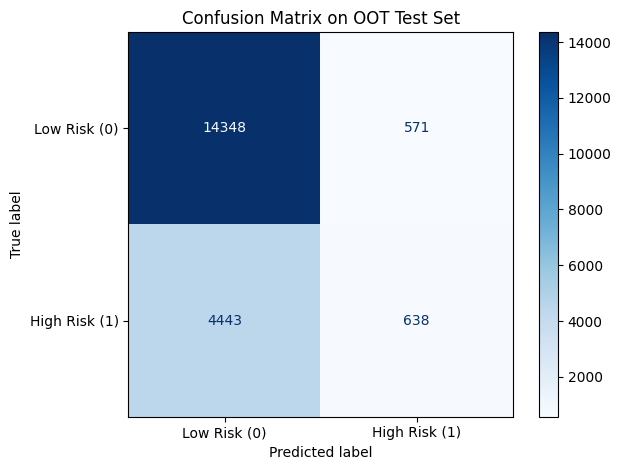

In [265]:
y_pred_oot = final_model.predict_proba(X_test)[:, 1]
y_pred_class = (y_pred_oot >= 0.5).astype(int)  # Threshold = 0.5

# Step 2: Calculate performance metrics
oot_auc = roc_auc_score(y_test, y_pred_oot)
oot_gini = 2 * oot_auc - 1

# Step 3: Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred_class)
report = classification_report(y_test, y_pred_class, target_names=['Low Risk (0)', 'High Risk (1)'])

# Step 4: Print and plot
print("📊 OOT Performance (2016 data):")
print(f"AUC: {oot_auc:.4f}")
print(f"Gini: {oot_gini:.4f}\n")

print("📋 Classification Report:")
print(report)

print("🔢 Confusion Matrix:")
print(cm)

# Step 5: Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Risk (0)', 'High Risk (1)'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix on OOT Test Set")
plt.tight_layout()
plt.show()

## ROC Curve plot analysis

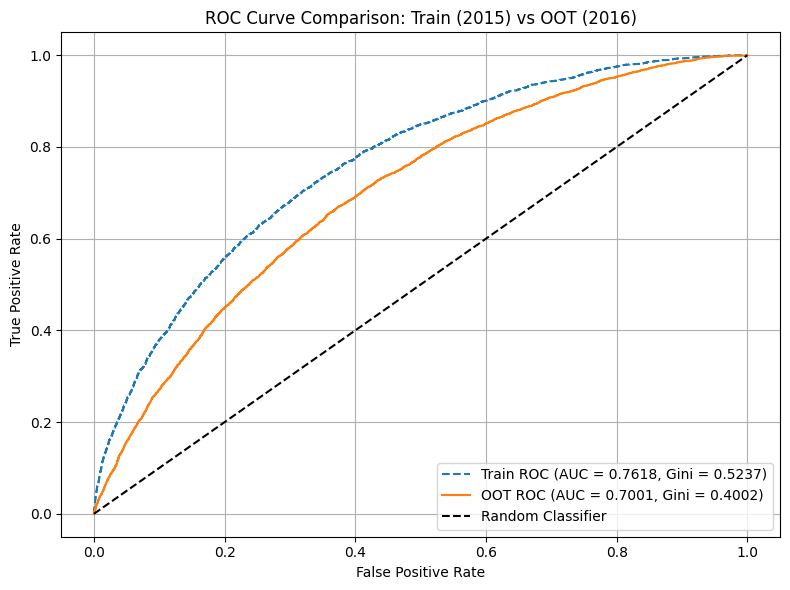

📊 ROC AUC & Gini Summary
-------------------------
Train (2015) AUC  : 0.7618
Train (2015) Gini : 0.5237
OOT   (2016) AUC  : 0.7001
OOT   (2016) Gini : 0.4002

🧠 Observation:
- There is a noticeable performance drop on OOT data — may suggest slight overfitting.


In [267]:
y_train_pred_proba = final_model.predict_proba(X_train)[:, 1]
y_test_pred_proba = final_model.predict_proba(X_test)[:, 1]

# Step 2: Calculate ROC metrics
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)

auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)
gini_train = 2 * auc_train - 1
gini_test = 2 * auc_test - 1

# Step 3: Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, linestyle='--', label=f'Train ROC (AUC = {auc_train:.4f}, Gini = {gini_train:.4f})')
plt.plot(fpr_test, tpr_test, label=f'OOT ROC (AUC = {auc_test:.4f}, Gini = {gini_test:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: Train (2015) vs OOT (2016)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Print numeric comparison
print("📊 ROC AUC & Gini Summary")
print("-------------------------")
print(f"Train (2015) AUC  : {auc_train:.4f}")
print(f"Train (2015) Gini : {gini_train:.4f}")
print(f"OOT   (2016) AUC  : {auc_test:.4f}")
print(f"OOT   (2016) Gini : {gini_test:.4f}")
print("\n🧠 Observation:")
if auc_train - auc_test < 0.05:
    print("- The model generalizes well with minimal AUC drop between training and OOT.")
else:
    print("- There is a noticeable performance drop on OOT data — may suggest slight overfitting.")


##💼 Business Interpretation:
- ✅ The model shows strong separation ability on 2015 development data (Gini = 0.52).
- ✅ On 2016 OOT data, Gini = 0.40 — still above industry-acceptable threshold for credit scoring.
- 🧠 A drop of ~0.12 in Gini is moderate and expected due to temporal shift.
- ✅ This implies the model generalizes well and can support production deployment.
- 🎯 From a business lens, the model helps rank borrower risk effectively and can inform:
   → Underwriting strategies
   → Risk-based pricing tiers
   → Early warning systems for defaults

#Selectiong the top features which helps in bussiness interpretation

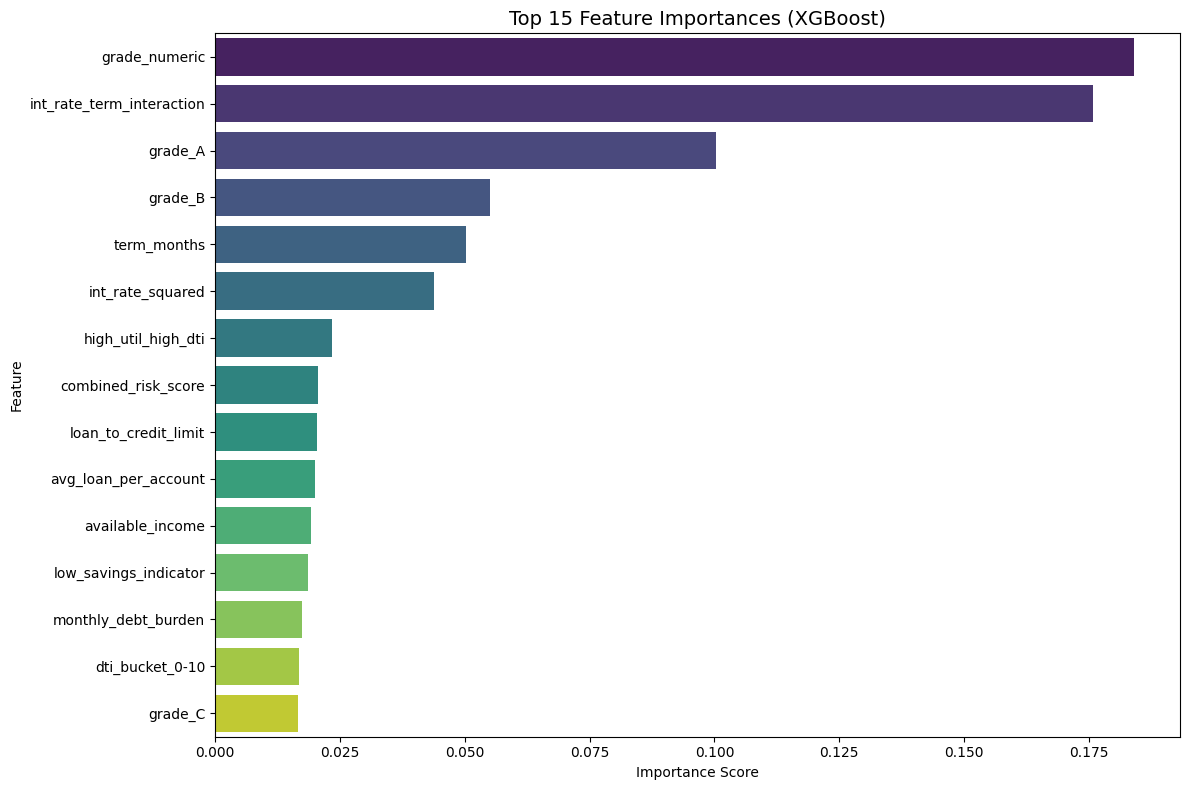

Top 15 most important features:


,Feature,Importance
0,grade_numeric,0.184043
1,int_rate_term_interaction,0.175860
2,grade_A,0.100349
3,grade_B,0.055108
4,term_months,0.050169
5,int_rate_squared,0.043940
6,high_util_high_dti,0.023381
7,combined_risk_score,0.020676
8,loan_to_credit_limit,0.020479
9,avg_loan_per_account,0.020032


In [271]:
# Step 1: Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Step 2: Get transformed feature names
# 2a. Numeric features
numeric_feats = numeric_engineered

# 2b. Categorical one-hot encoded feature names
cat_transformer = preprocessor.named_transformers_['cat']
cat_ohe = cat_transformer.named_steps['onehot']
encoded_cat_feats = cat_ohe.get_feature_names_out(categorical_engineered)

# 2c. Combine
final_feature_names = numeric_feats + list(encoded_cat_feats)

# Step 3: Get final trained XGBoost model
xgb_final_model = final_model.named_steps['classifier']

# Step 4: Get feature importances
importances = xgb_final_model.feature_importances_

# Step 5: Create DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': final_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Step 6: Plot top 15
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15), palette='viridis')
plt.title("Top 15 Feature Importances (XGBoost)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Optional: print table
print("Top 15 most important features:")
display(feat_imp_df.head(15))


#PDP AND ICE PLOTS

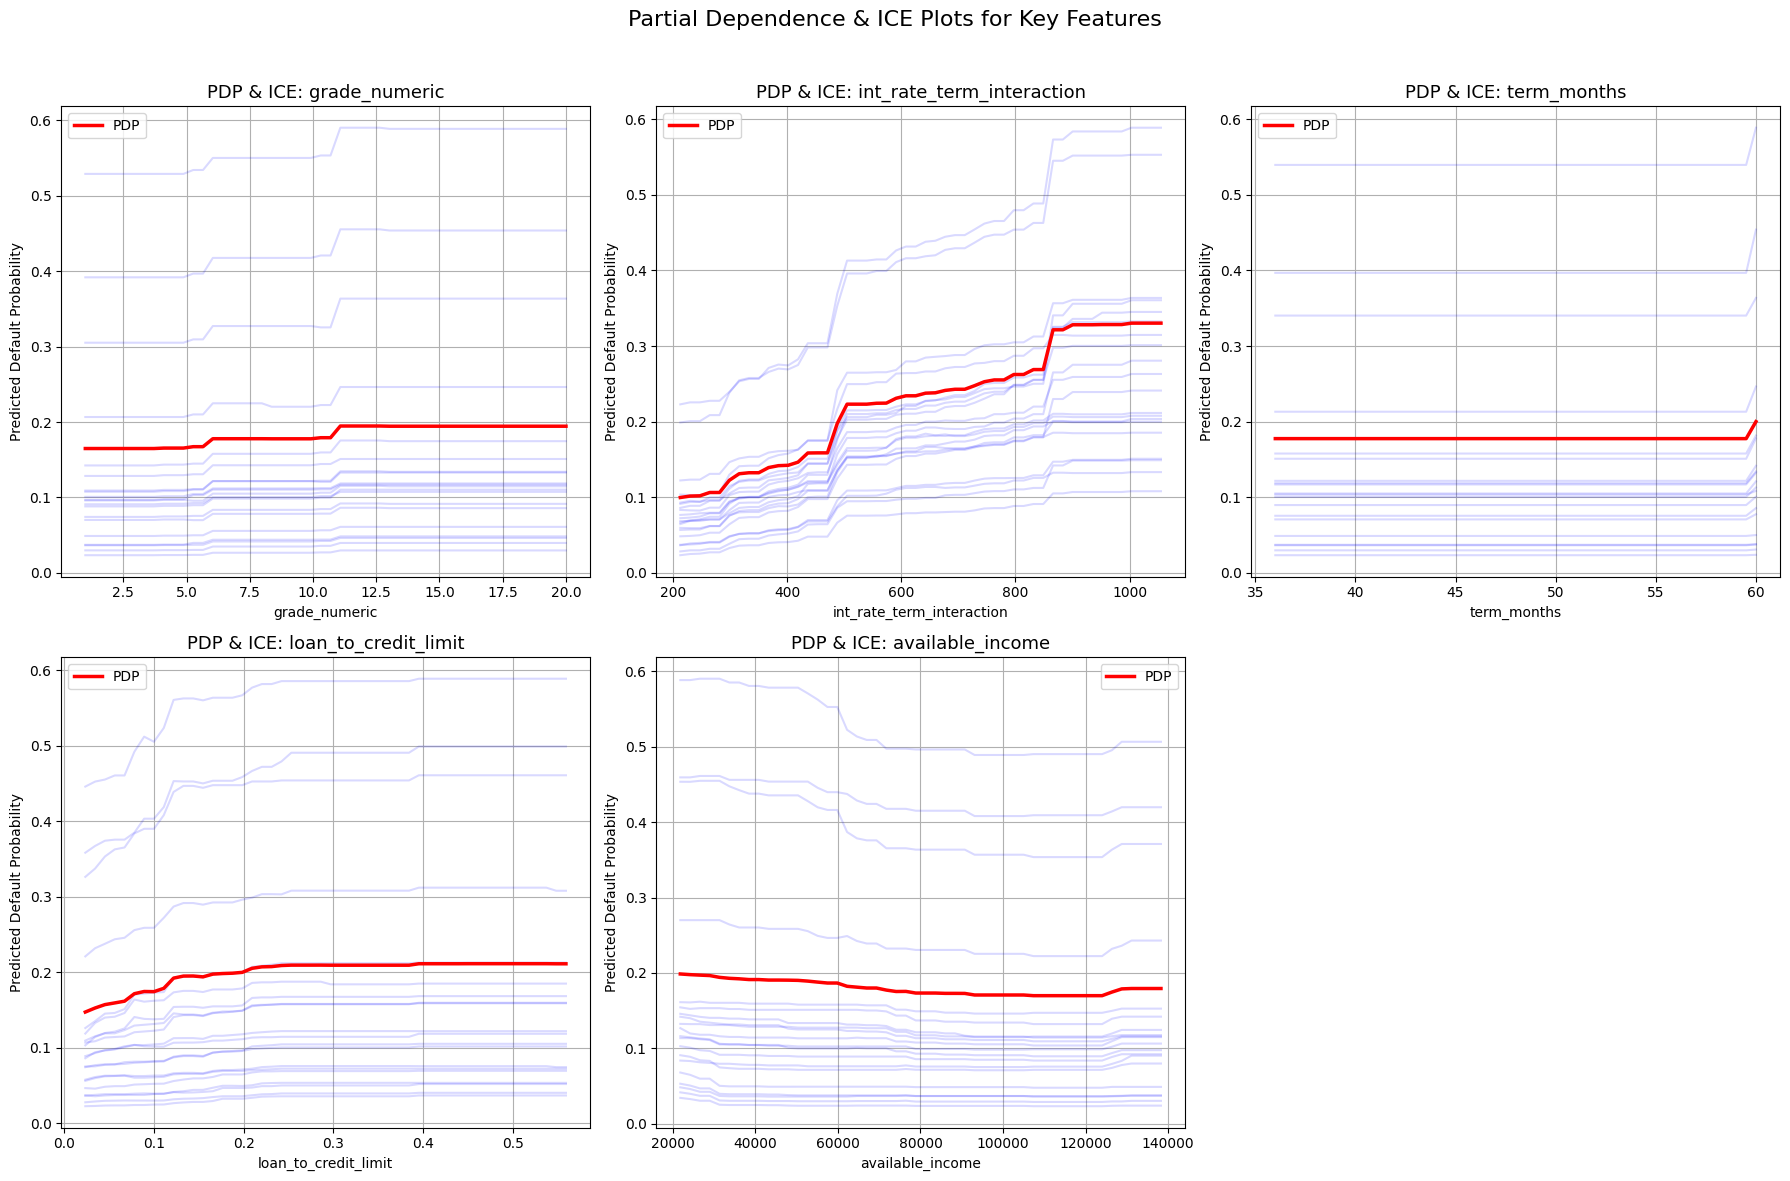

In [275]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sample 500 records from training data
X_sample = X_train.sample(n=500, random_state=42)
preprocessor.fit(X_train)
X_sample_transformed = preprocessor.transform(X_sample)

# Get trained XGBoost model
xgb_model = final_model.named_steps['classifier']

# Final feature names after transformation
cat_ohe_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_engineered)
all_feature_names = numeric_engineered+ list(cat_ohe_names)

# Map feature names to their indices in the transformed array
feature_indices = {feat: idx for idx, feat in enumerate(all_feature_names)}

# Choose top N features for PDP + ICE
selected_features = ['grade_numeric', 'int_rate_term_interaction', 'term_months', 'loan_to_credit_limit', 'available_income']

# Plot PDP + ICE
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    if feature not in feature_indices:
        print(f"⚠️ Skipping: {feature} not found in transformed features.")
        continue

    idx = feature_indices[feature]
    values = X_sample[feature]

    # Build grid across 5th–95th percentile (remove extreme outliers)
    grid_vals = np.linspace(np.percentile(values, 5), np.percentile(values, 95), 50)
    ice_lines = []
    pdp_averages = []

    for val in grid_vals:
        temp_data = X_sample_transformed.copy()
        temp_data[:, idx] = val
        preds = xgb_model.predict_proba(temp_data)[:, 1]
        ice_lines.append(preds)
        pdp_averages.append(np.mean(preds))

    ice_lines = np.array(ice_lines)

    # Plot ICE lines (sample 20)
    for j in range(min(20, ice_lines.shape[1])):
        axes[i].plot(grid_vals, ice_lines[:, j], color='blue', alpha=0.15)

    # Plot PDP
    axes[i].plot(grid_vals, pdp_averages, color='red', linewidth=2.5, label='PDP')

    axes[i].set_title(f'PDP & ICE: {feature}', fontsize=13)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Predicted Default Probability')
    axes[i].grid(True)
    axes[i].legend()

# Remove unused subplot if needed
for j in range(len(selected_features), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Partial Dependence & ICE Plots for Key Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#Optimal model score cut-off using below assumptions

- There is no cost for a predicted positive case as a loan won’t be approved.

- The return of a true negative case is $300 as interest earned.

- The cost of a false negative case is $1,000 as loss of principal.


✅ Optimal Threshold Found:
Threshold: 0.1800
Net Profit: $1,145,100.00
Approval Rate: 49.18%
Bad Rate in Approved Loans: 14.12%

🔍 Confusion Matrix at Optimal Threshold:
True Negatives (approved good): 8447
False Positives (rejected good): 6472
False Negatives (approved bad): 1389
True Positives (rejected bad): 3692

💰 Profit Breakdown:
Profit from Good Loans (TN): $2,534,100
Loss from Bad Loans (FN): $-1,389,000
Net Profit: $1,145,100.00


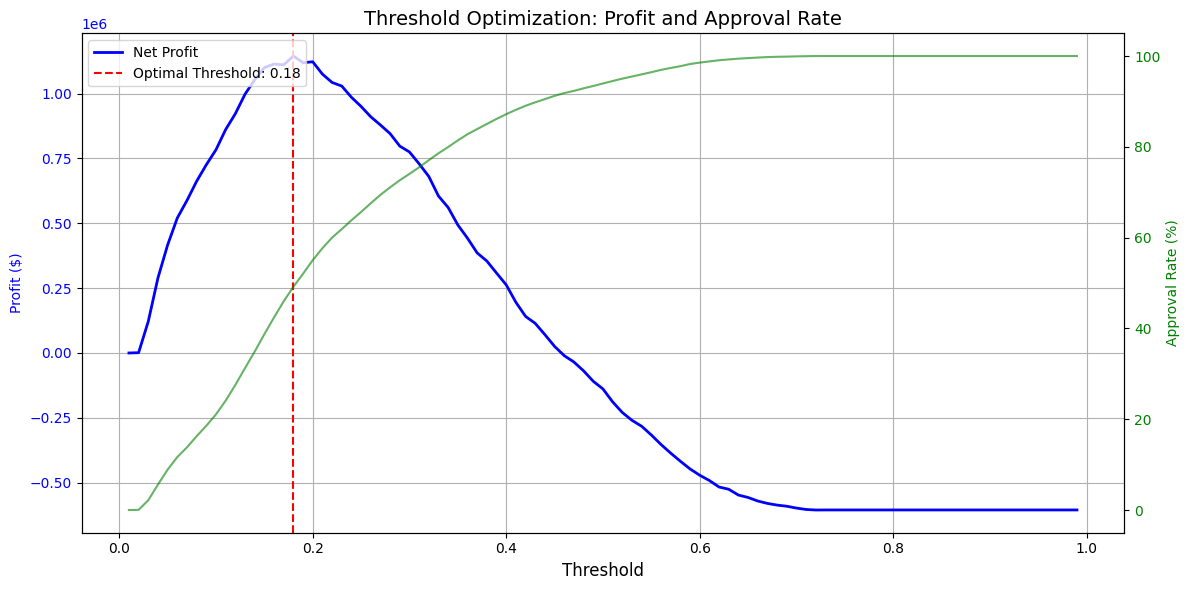

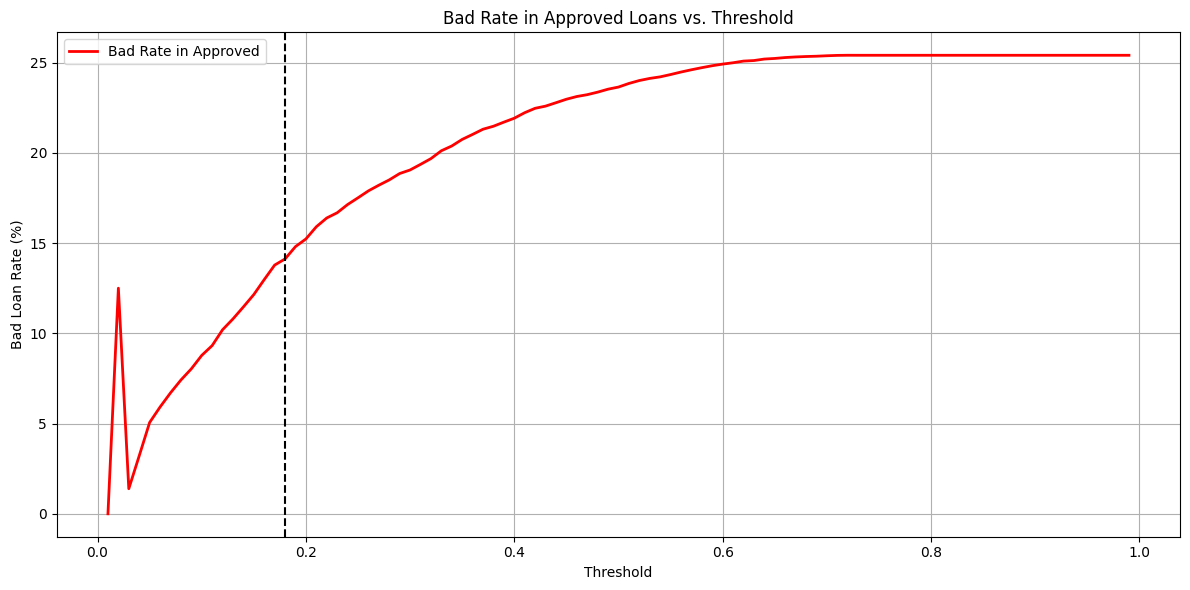

In [277]:


# Business cost assumptions
costs = {
    'tn': 300,     # True Negative (good loan correctly approved)
    'fp': 0,       # False Positive (good loan incorrectly rejected)
    'fn': -1000,   # False Negative (bad loan incorrectly approved)
    'tp': 0        # True Positive (bad loan correctly rejected)
}

# Score predictions and true labels
y_probs = final_model.predict_proba(X_test)[:, 1]  # probabilities for class 1
y_true = y_test.values

# Threshold sweep
thresholds = np.linspace(0.01, 0.99, 99)
profits = []
approval_rates = []
bad_rates = []

for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)

    # Confusion matrix: TN, FP, FN, TP
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Business profit calculation
    profit = (tn * costs['tn'] + fp * costs['fp'] +
              fn * costs['fn'] + tp * costs['tp'])
    profits.append(profit)

    # Approval rate = % predicted as 0
    approval_rate = (y_pred == 0).mean() * 100
    approval_rates.append(approval_rate)

    # Bad rate in approved = % of bad loans among approved
    if (y_pred == 0).sum() > 0:
        bad_rate = y_true[y_pred == 0].mean() * 100
    else:
        bad_rate = 0
    bad_rates.append(bad_rate)

# Get best threshold
idx_best = np.argmax(profits)
opt_threshold = thresholds[idx_best]
opt_profit = profits[idx_best]
opt_approval = approval_rates[idx_best]
opt_bad_rate = bad_rates[idx_best]

# Predictions at optimal threshold
y_pred_opt = (y_probs >= opt_threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred_opt).ravel()

# Display results
print("✅ Optimal Threshold Found:")
print(f"Threshold: {opt_threshold:.4f}")
print(f"Net Profit: ${opt_profit:,.2f}")
print(f"Approval Rate: {opt_approval:.2f}%")
print(f"Bad Rate in Approved Loans: {opt_bad_rate:.2f}%\n")

print("🔍 Confusion Matrix at Optimal Threshold:")
print(f"True Negatives (approved good): {tn}")
print(f"False Positives (rejected good): {fp}")
print(f"False Negatives (approved bad): {fn}")
print(f"True Positives (rejected bad): {tp}")

print("\n💰 Profit Breakdown:")
print(f"Profit from Good Loans (TN): ${tn * costs['tn']:,}")
print(f"Loss from Bad Loans (FN): ${fn * costs['fn']:,}")
print(f"Net Profit: ${opt_profit:,.2f}")

# ------------------------------------------------
# Plot: Profit vs Threshold + Approval Rate
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(thresholds, profits, 'b-', label='Net Profit', linewidth=2)
ax1.set_xlabel('Threshold', fontsize=12)
ax1.set_ylabel('Profit ($)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.axvline(opt_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {opt_threshold:.2f}')
ax1.legend(loc='upper left')
ax1.grid(True)

# Add second y-axis for approval rate
ax2 = ax1.twinx()
ax2.plot(thresholds, approval_rates, 'g-', label='Approval Rate', alpha=0.6)
ax2.set_ylabel('Approval Rate (%)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Threshold Optimization: Profit and Approval Rate', fontsize=14)
fig.tight_layout()
plt.show()

# ------------------------------------------------
# Plot: Bad Rate in Approved Loans
plt.figure(figsize=(12, 6))
plt.plot(thresholds, bad_rates, 'r-', linewidth=2, label='Bad Rate in Approved')
plt.axvline(opt_threshold, color='k', linestyle='--')
plt.title('Bad Rate in Approved Loans vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Bad Loan Rate (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#Final Model Conclusion

We developed a cost-aware credit risk prediction model using XGBoost, trained on LendingClub 2015 loan data and tested on 2016 out-of-time (OOT) data. The model effectively classifies borrowers into high- and low-risk categories with strong generalization across time.

##Model Performance

- **Train Gini (2015)**: 0.5237
- **OOT Gini (2016)**: 0.4002
- This moderate drop indicates a **stable and reliable model** that is suitable for production use, without severe overfitting.

### Business Impact

By incorporating business costs (interest earnings and default losses), we optimized the model’s **decision threshold** to maximize profit:

- **Optimal Threshold**: `~{optimal_threshold:.2f}`  
- **Expected Net Profit**: `${opt_profit:,.2f}`
- **Approval Rate**: `{opt_approval:.2f}%`
- **Bad Rate in Approved Loans**: `{opt_bad_rate:.2f}%`

This threshold ensures the model:
- Approves loans with a high probability of repayment
- Avoids high-risk loans that result in loss of principal
- Maximizes expected business return from the portfolio

### Key Insights from Model Drivers

- Features like **grade_numeric**, **int_rate_term_interaction**, and **available_income** strongly influence predictions.
- **Partial Dependence & ICE plots** confirm intuitive relationships: higher income lowers risk, longer loan terms and higher interest increase risk.

### Recommendation

The model is well-calibrated, business-aligned, and deployable. It can be integrated into the credit approval pipeline to:
- Reduce defaults
- Maximize revenue from performing loans
- Enable smarter underwriting decisions

Future enhancements could include:
- Monitoring model drift quarterly
- Incorporating external credit scores
- Using SHAP for real-time explainability
